## Exercise MovieLens 电影数据分析

### 作业要求：（单人组）

__Task1__：在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。



__Task2__：在 movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）


__Task3__：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。


#### 读取moivelens 1M 数据（data目录）

- 1. user， movies， rating三个表

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [56]:
print(ratings[0:5])
print(users[0:5])
print(movies[0:5])

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of

In [57]:
# a = data_mat_freq @ data_mat_freq.T  # 20分钟
# np.save("data/movie_coRating_count",a ) #保存数组
# a[0]
# 该数组在data目录里作为数据环境下发，可以直接使用

In [58]:
# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [59]:
movies_info

,movie_id,name,genre,release_time,intro,directors,stars
0,1,Toy Story (1995),Animation|Adventure|Comedy,22 November 1995 (USA),A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,2,Jumanji (1995),Adventure|Comedy|Family,15 December 1995 (USA),When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt
2,3,Grumpier Old Men (1995),Comedy|Romance,22 December 1995 (USA),John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,22 December 1995 (USA),"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,5,Father of the Bride Part II (1995),Comedy|Family|Romance,8 December 1995 (USA),George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short
...,...,...,...,...,...,...,...
9737,193581,Kuroshitsuji: Book of the Atlantic (2017),Animation,21 January 2017 (Japan),A young lord and his demon butler board a luxu...,Noriyuki Abe|Stephen Hoff,Bryn Apprill|Dawn Michelle Bennett|Justin Briner
9738,193583,NÃ´gÃªmu nÃ´raifu: Zero (2017),Animation|Adventure|Comedy,19 July 2019 (China),"Adaption of the sixth Light Novel of series, i...",Atsuko Ishizuka,Alexandra Bedford|Jessica Boone|Ricardo Contreras
9739,193585,Flint (2017),Drama,TV Movie 28 October 2017,A woman deals with the toxic water scandal in ...,Bruce Beresford,Marin Ireland|Betsy Brandt|Queen Latifah
9740,193587,Bungou Stray Dogs: Dead Apple (2018),Animation,3 March 2018 (Japan),Rivalry between groups of criminals and detect...,Takuya Igarashi,Brian Beacock|Ray Chase|Lucien Dodge


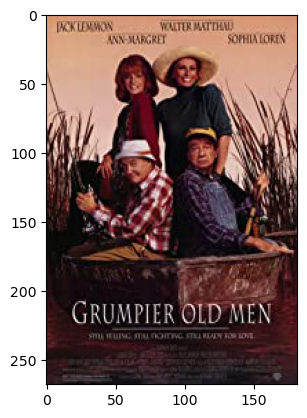

In [60]:
import matplotlib.pyplot as plt
import cv2 
poster_i = cv2.imread('data/poster/3.jpg',cv2.IMREAD_COLOR)
poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
plt.imshow(poster_i)  

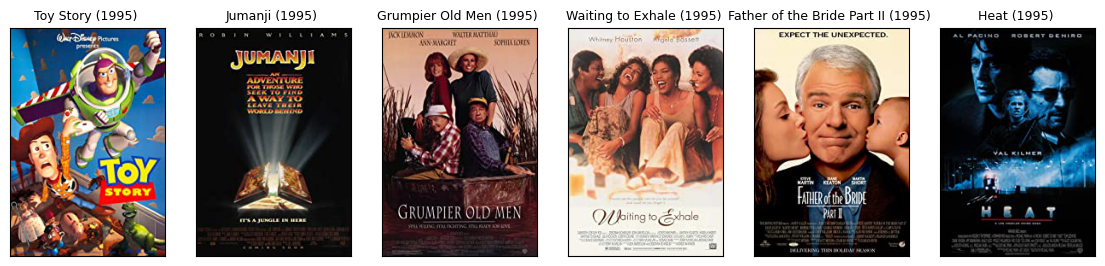

In [61]:
plt.figure(figsize=(14,10))
for i in movies_info[:6]['movie_id']:
    plt.subplot(1, 6, i)
    poster_i = cv2.imread('data/poster/'+ str(i) + '.jpg', 1)
    poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
    plt.imshow(poster_i)
    plt.title(movies_info.iloc[i-1]['name'], size=9)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Task 1:

在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。


In [62]:
# 统计用户性别分布
users_gender_count=users["gender"].value_counts()
print("Users gender distribution:\n", users_gender_count)


Users gender distribution:
 M    4331
F    1709
Name: gender, dtype: int64


In [63]:
# 筛选出评分数大于 300 的电影
movie_rating_count=ratings["movie_id"].value_counts()
popular_movies_id=movie_rating_count[movie_rating_count>300]
popular_movies=movies[movies["movie_id"].isin(popular_movies_id)]
print("Popular Movies:")
display(popular_movies[0:5])

Popular Movies:


,movie_id,title,genres
298,301,Picture Bride (1995),Drama|Romance
299,302,Queen Margot (La Reine Margot) (1994),Drama|Romance
300,303,"Quick and the Dead, The (1995)",Action|Adventure|Western
301,304,Roommates (1995),Comedy|Drama
302,305,Ready to Wear (Pret-A-Porter) (1994),Comedy


In [64]:
# 分别统计男性和女性观众对电影的平均评分，筛选出前 20 部男性/女性偏好的电影
## 筛选出流行电影的评分信息
popular_movie_rating=pd.merge(ratings,popular_movies,on="movie_id")
## 将其评分信息与用户信息合并
popular_movie_user_rating=pd.merge(popular_movie_rating,users,on='user_id')
## 计算出男性/女性观众对某部电影的平均评分
average_ratings=popular_movie_user_rating.groupby(["gender","movie_id"])["rating"].mean().unstack()
print("Average ratings:")
display(average_ratings)
## 取出男性/女性用户评分最高的 20 部电影
M_prefer_movies_id=average_ratings.loc["M"].sort_values(ascending=False)[:20]
F_prefer_movies_id=average_ratings.loc["F"].sort_values(ascending=False)[:20]
M_prefer_movies=pd.merge(M_prefer_movies_id,movies,on='movie_id').rename(columns={'M':'M_average_rating'})
F_prefer_movies=pd.merge(F_prefer_movies_id,movies,on='movie_id').rename(columns={'F':'F_average_rating'})
print("Male prefer these movies:")
display(M_prefer_movies)
print("Female prefer these movies:")
display(F_prefer_movies)

Average ratings:


movie_id,301,302,303,304,305,306,307,308,309,310,...,2578,2583,2590,2649,2653,2672,2883,2990,2991,3428
gender,,,,,,,,,,,,,,,,,,,,,
F,3.368421,3.916667,3.042553,2.888889,2.452381,4.243478,4.108434,3.985507,3.625,2.333333,...,3.000000,3.519481,3.153846,3.333333,3.000000,3.132353,3.530120,3.196078,3.375000,3.214286
M,3.250000,3.684211,2.967655,3.230769,2.529412,4.219178,4.093750,3.954887,3.750,3.000000,...,3.666667,3.651899,2.909091,3.320755,2.714286,3.201238,3.556701,3.200599,3.625683,2.866667


Male prefer these movies:


,movie_id,M_average_rating,title,genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,598,4.666667,Window to Paris (1994),Comedy
2,318,4.560625,"Shawshank Redemption, The (1994)",Drama
3,578,4.500000,"Hour of the Pig, The (1993)",Drama|Mystery
4,557,4.500000,Mamma Roma (1962),Drama
5,527,4.491415,Schindler's List (1993),Drama|War
6,1148,4.478261,"Wrong Trousers, The (1993)",Animation|Comedy
7,745,4.473795,"Close Shave, A (1995)",Animation|Comedy|Thriller
8,750,4.464789,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War
9,912,4.461340,Casablanca (1942),Drama|Romance|War


Female prefer these movies:


,movie_id,F_average_rating,title,genres
0,394,5.000000,Coldblooded (1995),Action
1,1071,5.000000,For the Moment (1994),Romance|War
2,687,5.000000,Country Life (1994),Drama|Romance
3,2538,5.000000,Dancemaker (1998),Documentary
4,669,4.666667,Aparajito (1956),Drama
5,745,4.644444,"Close Shave, A (1995)",Animation|Comedy|Thriller
6,1148,4.588235,"Wrong Trousers, The (1993)",Animation|Comedy
7,720,4.563107,Wallace & Gromit: The Best of Aardman Animatio...,Animation
8,527,4.562602,Schindler's List (1993),Drama|War
9,318,4.539075,"Shawshank Redemption, The (1994)",Drama


In [65]:
# 对于每种电影类型，计算男性和女性观众的偏好度，并进行归一化
## 处理电影类型的数据，做数据分割
movies_copy=movies.copy()
movies_copy["genres"]=movies_copy["genres"].str.split('|')
movies_copy=movies_copy.explode("genres")

# 整合拼接信息 
rating_movies_genres=pd.merge(ratings,movies_copy,on="movie_id")
rating_movies_users_genres=pd.merge(rating_movies_genres,users,on="user_id")

# 根据性别和电影种类计算看过某种电影的人数
genres_count=rating_movies_users_genres.groupby("gender")['genres'].value_counts()
count_F=genres_count['F']
count_M=genres_count['M']

# 对数据做归一化：
count_F_normalized=count_F/count_F.sum()
count_M_normalized=count_M/count_M.sum()
rating_movies_users_genres

,user_id,movie_id,rating,timestamp,title,genres,gender,zipcode,age_desc,occ_desc
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,48067,Under 18,K-12 student
1,1,661,3,978302109,James and the Giant Peach (1996),Animation,F,48067,Under 18,K-12 student
2,1,661,3,978302109,James and the Giant Peach (1996),Children's,F,48067,Under 18,K-12 student
3,1,661,3,978302109,James and the Giant Peach (1996),Musical,F,48067,Under 18,K-12 student
4,1,914,3,978301968,My Fair Lady (1964),Musical,F,48067,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...,...
2101810,4211,3766,2,965319138,Missing in Action (1984),Action,M,77662,45-49,customer service
2101811,4211,3766,2,965319138,Missing in Action (1984),War,M,77662,45-49,customer service
2101812,4211,3834,2,965318885,Bronco Billy (1980),Adventure,M,77662,45-49,customer service
2101813,4211,3834,2,965318885,Bronco Billy (1980),Drama,M,77662,45-49,customer service


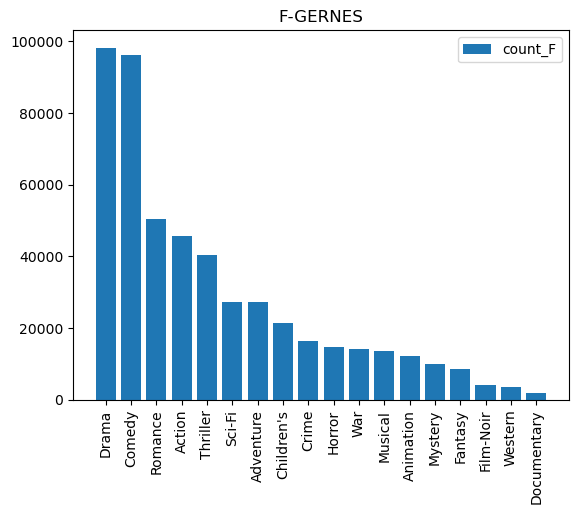

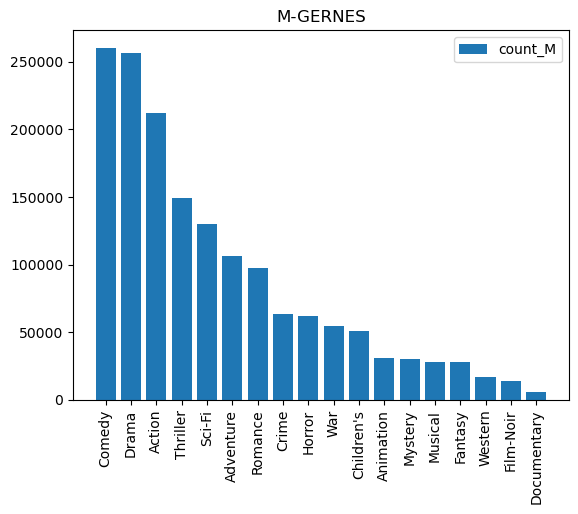

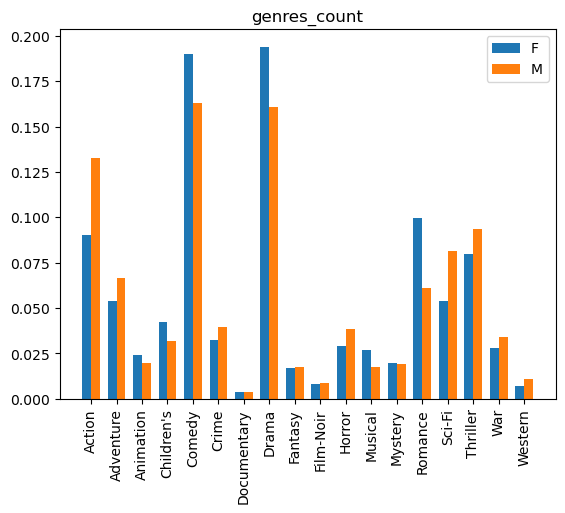

In [66]:
# 可视化
plt.subplot()
plt.bar(count_F.index,count_F.to_list(),label='count_F')
plt.title("F-GERNES")
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.subplot()
plt.bar(count_M.index,count_M.to_list(),label='count_M')
plt.title("M-GERNES")
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.subplot()
x=np.arange(len(count_F_normalized.to_list()))
width=0.35
count_F_normalized=count_F_normalized.sort_index()
count_M_normalized=count_M_normalized.sort_index()
p1=plt.bar(x-width/2,count_F_normalized.to_list(),label="F",width=width)
p2=plt.bar(x+width/2,count_M_normalized.to_list(),label="M",width=width)
plt.title("genres_count")
plt.xticks(x,labels=count_F_normalized.index,rotation=90)
plt.legend()
plt.show()



### Task2：

在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）


In [67]:
# 导入常用库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score

In [68]:
# 综合信息

## 将所有信息综合在一起
data=pd.merge(pd.merge(ratings,users,on='user_id'),movies,on='movie_id')
print(data.shape)
## 选出观影数大于 100 的用户
user_rating_count=data['user_id'].value_counts()
active_users=user_rating_count[user_rating_count>100].index
data=data[data['user_id'].isin(active_users)]


(1000209, 10)


In [69]:
# 数据预处理

## 将电影的种类，年龄段和观众的性别编码为数值
label_encoder = LabelEncoder()

### 编码性别
data["gender"] = label_encoder.fit_transform(data["gender"])

### 先将每部电影的种类分解，再将每个分解后的特征编码为二进制，最后将得到的数值向量拼接回数据矩阵用于训练模型
genres = set()
for movie_genres in data["genres"].str.split("|"):
    genres.update(movie_genres)
genres = sorted(genres)
for genre in genres:
    data[genre] = data["genres"].str.contains(genre).astype(int)

### 对年龄段做有序映射
agedesc_map={'Under 18':0,'18-24':1,'25-34':2,'35-44':3,'45-49':4,'50-55':5,'56+':6}
agedesc_inv_map=['Under 18','18-24','25-34','35-44','45-49','50-55','56+']
mapped_age=data['age_desc'].apply(lambda x:agedesc_map[str(x).strip()])
mapped_age.name='mapped_age'


## 将映射后的特征值拼接回矩阵中
data = pd.concat([data, mapped_age], axis=1)

### 以评分和电影种类的编码向量作为判断依据，将用户性别和年龄段映射值作为预测目标
data=data.sort_values(by='user_id')
display(data)


,user_id,movie_id,rating,timestamp,gender,zipcode,age_desc,occ_desc,title,genres,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,mapped_age
1,2,1193,5,978298413,1,70072,56+,self-employed,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,6
68284,2,2916,3,978299809,1,70072,56+,self-employed,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller,...,0,0,0,0,0,1,1,0,0,6
166809,2,3451,4,978298924,1,70072,56+,self-employed,Guess Who's Coming to Dinner (1967),Comedy|Drama,...,0,0,0,0,0,0,0,0,0,6
167159,2,3095,4,978298517,1,70072,56+,self-employed,"Grapes of Wrath, The (1940)",Drama,...,0,0,0,0,0,0,0,0,0,6
70280,2,3468,5,978298542,1,70072,56+,self-employed,"Hustler, The (1961)",Drama,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73612,6040,1210,2,956715805,1,11106,25-34,doctor/health care,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,...,0,0,0,0,1,1,0,1,0,2
693413,6040,2648,4,957717423,1,11106,25-34,doctor/health care,Frankenstein (1931),Horror,...,0,1,0,0,0,0,0,0,0,2
478349,6040,916,5,957717557,1,11106,25-34,doctor/health care,Roman Holiday (1953),Comedy|Romance,...,0,0,0,0,1,0,0,0,0,2
262996,6040,162,4,956704953,1,11106,25-34,doctor/health care,Crumb (1994),Documentary,...,0,0,0,0,0,0,0,0,0,2


In [70]:
# 提取某个用户的所有特征
def extract_user_features(user_data):
    user_features=[]
    
    # age
    age=user_data["mapped_age"].iloc[0]
    # gender
    gender=user_data["gender"].iloc[0]

    # Genres，计算用户观看每种电影类型的电影的数量
    genres_features=user_data[genres].sum().tolist()
    user_features.extend(genres_features)
    
    # ratings，计算用户对于某种电影类型的平均评分，若未评分，则将其置为 0
    data_copy=user_data.copy()
    data_copy["genres"]=data_copy["genres"].str.split('|')
    data_copy=data_copy.explode("genres")
    rating_features=data_copy.groupby("genres")["rating"].mean()
    for id in genres:
        if id not in rating_features.index:
            rating_features[str(id)]=0
    rating_features=rating_features.sort_index()
    user_features.extend(list(rating_features))

    return (user_features,age,gender)

# 提取所有用户的特征值，作为训练数据
def extract_features(data):
    user_features=[]
    ages=[]
    genders=[]
    for user_id,user_data in data.groupby("user_id"):
        features,age,gender=extract_user_features(user_data)
        user_features.append(features)
        ages.append(age)
        genders.append(gender)
    user_features=pd.DataFrame(user_features)
    ages=pd.DataFrame(ages)
    genders=pd.DataFrame(genders)
    return (user_features,ages,genders)

In [71]:

# 得到的特征向量和预测目标值作为训练模型的 X 和 y
data_features,data_ages,data_genders=extract_features(data)
X_train_age,X_test_age,Y_train_age,Y_test_age=train_test_split(data_features,data_ages,test_size=0.2,random_state=42)
X_train_gender,X_test_gender,Y_train_gender,Y_test_gender=train_test_split(data_features,data_genders,test_size=0.2,random_state=42)


In [72]:
# PCA 降维
pca=PCA(n_components=10,random_state=42)
X_age_pca=pca.fit_transform(pd.concat([X_train_age,X_test_age],axis=0))
X_train_age_pca=pd.DataFrame(X_age_pca[0:X_train_age.shape[0]])
X_test_age_pca=pd.DataFrame(X_age_pca[X_train_age.shape[0]:])

X_gender_pca=pca.fit_transform(pd.concat([X_train_gender,X_test_gender],axis=0))
X_train_gender_pca=pd.DataFrame(X_gender_pca[0:X_train_gender.shape[0]])
X_test_gender_pca=pd.DataFrame(X_gender_pca[X_train_gender.shape[0]:])



In [73]:
# 手动实现 GaussionNB
class GaussianNB(object):
    def __init__(self):
        pass
    def fit(self,X_train,Y_train):
        self._data_with_label=X_train.copy()
        self._Y_train=Y_train.copy()
        # 有监督数据
        self._data_with_label['label']=Y_train[0]
        # 每个类别的特征分布，均值
        self._mean_mat=self._data_with_label.groupby('label').mean()
        # 方差
        self._var_mat=self._data_with_label.groupby('label').var()
        # 统计先验类别
        self.prior_rate=self.__Priori()
        return self
    
    # 先验概率
    def __Priori(self):
        # label 计数
        labels=self._Y_train[0].value_counts().sort_index()
        # label 比例
        prior_rate=np.array([i/sum(labels) for i in labels])
        return prior_rate
    
    # 模型预测
    def predict(self,X_test):
        pred=[self.__Condition_formula(self._mean_mat,self._var_mat,row)*self.prior_rate for row in X_test.values]
        class_result=np.argmax(pred,axis=1)
        return class_result

    def __Condition_formula(self,mu,sigma2,row):
        from math import pi
        # 高斯函数计算先验
        P_mat=1/np.sqrt(2*pi*sigma2)*np.exp(-(row-mu)**2/(2*sigma2))
        # 返回一列的乘积
        P_mat=pd.DataFrame(P_mat).prod(axis=1)
        return P_mat

In [74]:
# 训练分类器
NB_age=GaussianNB()
NB_age.fit(X_train_age_pca,Y_train_age)
NB_gender=GaussianNB()
NB_gender.fit(X_train_gender_pca,Y_train_gender)

# 预测
y_pred_gender=NB_gender.predict(X_test_age_pca)
y_pred_age=NB_age.predict(X_test_gender_pca)

# 测评准确率
print(f"Accuracy score GENDER: {accuracy_score(Y_test_gender, y_pred_gender)}")
print(f"Recall score GENDER:{recall_score(Y_test_gender,y_pred_gender,average='weighted')}")

print(f"Accuracy score AGE: {accuracy_score(Y_test_age, y_pred_age)}")
print(f"Recall score AGE:{recall_score(Y_test_age,y_pred_age,average='weighted')}")

Accuracy score GENDER: 0.7525773195876289
Recall score GENDER:0.7525773195876289
Accuracy score AGE: 0.34536082474226804
Recall score AGE:0.34536082474226804


In [75]:

## SVC 调包实现
# 训练分类器
clf_gender=SVC(random_state=42)
clf_gender.fit(X_train_age_pca,Y_train_gender[0])

clf_age = SVC(random_state=42)
clf_age.fit(X_train_gender_pca, Y_train_age[0])

# 预测结果
y_pred_gender=clf_gender.predict(X_test_age_pca)
y_pred_age=clf_age.predict(X_test_gender_pca)

# 测评准确率
print(f"Accuracy score GENDER: {accuracy_score(Y_test_gender, y_pred_gender)}")
print(f"Recall score GENDER:{recall_score(Y_test_gender,y_pred_gender,average='weighted')}")

print(f"Accuracy score AGE: {accuracy_score(Y_test_age, y_pred_age)}")
print(f"Recall score AGE:{recall_score(Y_test_age,y_pred_age,average='weighted')}")

Accuracy score GENDER: 0.8006872852233677
Recall score GENDER:0.8006872852233677
Accuracy score AGE: 0.36254295532646047
Recall score AGE:0.36254295532646047


### Task 3
在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。


In [76]:
from scipy.sparse.linalg import svds
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

In [77]:
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [78]:
# 数据预处理
## 筛选出观影数量大于100的用户信息
user_rating_count=ratings["user_id"].value_counts()
active_users=user_rating_count[user_rating_count>100].index
## 筛选出这些用户的评分数据
active_user_ratings=ratings[ratings["user_id"].isin(active_users)]
## 筛选出被这些用户观看过的电影
active_user_movies=ratings[ratings["user_id"].isin(active_users)]["movie_id"]
## 将 movies 和 movie_info 矩阵拼接在一起
movies_merge=movies.merge(movies_info[["intro","directors","stars","movie_id"]],on="movie_id",how="outer")
## 删除电影矩阵中未出现在ratings矩阵里的电影id对应的行
movies_merge=movies_merge[movies_merge["movie_id"].isin(active_user_movies)]#.fillna("")
movies_merge=movies_merge.sort_values(by="movie_id")
## 记录电影被观众评分的次数
rating_counts=active_user_ratings["movie_id"].value_counts().sort_index()
rating_counts=pd.DataFrame(rating_counts).reset_index()
rating_counts=rating_counts.rename({"index":"movie_id","movie_id":"rating_count"},axis=1)

movies_merge=movies_merge.merge(rating_counts,on="movie_id")
## 构建用户-电影评分矩阵
user_movie_matrix=active_user_ratings.pivot_table(index="user_id",columns="movie_id",values="rating").fillna(0)
print("Movies table:")
display(movies_merge[0:5])
print("Movies shape: ",movies_merge.shape)
print("User-Movie Matrix shape: ",user_movie_matrix.shape)
display(user_movie_matrix[0:5])
## 取出活跃用户的信息
users_active=users[users["user_id"].isin(active_users)]

Movies table:


,movie_id,title,genres,intro,directors,stars,rating_count
0,1,Toy Story (1995),Animation|Children's|Comedy,A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles,1566
1,2,Jumanji (1995),Adventure|Children's|Fantasy,When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt,624
2,3,Grumpier Old Men (1995),Comedy|Romance,John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret,394
3,4,Waiting to Exhale (1995),Comedy|Drama,"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine,160
4,5,Father of the Bride Part II (1995),Comedy,George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short,268


Movies shape:  (3670, 7)
User-Movie Matrix shape:  (2909, 3670)


movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
10,5.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [79]:
# User-Movie 矩阵降维
## 进行SVD分解
U, sigma, Vt = svds(user_movie_matrix.to_numpy(), k=50)
print(U.shape,sigma.shape,Vt.shape)
## 构造对角矩阵
sigma = np.diag(sigma)
## 重构原始矩阵
user_movie_matrix_svd = U@sigma@Vt
((sigma@Vt).T).shape


(2909, 50) (50,) (50, 3670)


(3670, 50)

In [80]:
# TF-IDF 特征
## 初始化 TF-IDF 向量器
vectorizer=TfidfVectorizer(max_features=100,stop_words="english")
## 计算 TF-IDF 值
tfidf_maxtrix=vectorizer.fit_transform(movies_merge["intro"].values.astype('U'))
## 结果转换为 DataFrame
text_semantic_vectors=pd.DataFrame(tfidf_maxtrix.toarray(),index=movies_merge["movie_id"])


pca=PCA(n_components=0.99,random_state=42)
text_semantic_vectors=pca.fit_transform(text_semantic_vectors)
text_semantic_vectors=pd.DataFrame(text_semantic_vectors)
text_semantic_vectors

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-0.215040,-0.139652,-0.164258,0.290073,-0.282555,0.250443,-0.090785,0.102865,0.006893,0.063110,...,0.009532,0.020110,-0.070478,-0.030654,0.038167,-0.029674,0.002135,0.001553,-0.053102,0.112228
1,-0.227922,0.824498,0.065064,0.395059,0.152264,-0.183625,-0.030106,-0.034464,0.003491,0.042329,...,0.003816,0.010128,0.000934,0.005995,0.002924,0.005534,-0.000482,0.008106,-0.009716,0.005081
2,-0.205899,-0.136046,-0.131122,0.256954,-0.136778,0.099664,0.002934,0.049823,-0.017845,0.023991,...,-0.036474,0.013434,0.011674,0.014546,0.039313,0.027214,-0.024722,0.027214,-0.005618,0.053503
3,-0.200953,-0.069591,-0.001900,-0.023918,0.033082,-0.164131,-0.008858,0.093107,0.083690,0.052884,...,-0.049557,-0.081326,-0.011761,-0.013587,-0.025587,0.026941,0.006809,-0.000262,-0.009036,0.004800
4,-0.199268,-0.025284,-0.029819,0.005312,0.033289,-0.062969,0.055366,-0.085633,-0.097122,-0.099607,...,0.003602,0.008318,0.007873,-0.027264,0.021297,0.043180,-0.050201,0.050404,-0.021173,-0.024623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,-0.195058,-0.027683,-0.050532,-0.044128,0.020389,-0.005250,-0.050010,-0.024424,-0.036873,-0.057270,...,-0.013942,0.035483,-0.038965,0.032146,-0.041833,0.086338,-0.036224,0.012508,-0.011734,-0.013343
3666,-0.193152,-0.065044,-0.044453,-0.027941,0.024122,-0.087512,-0.032012,-0.037783,-0.055304,0.024867,...,-0.020316,0.038862,-0.073343,0.087032,0.032533,0.034750,-0.000480,-0.099861,-0.141935,0.035983
3667,-0.215910,0.065747,-0.075957,-0.193255,-0.138500,0.067296,-0.160929,0.098696,-0.101290,0.069361,...,0.044274,0.038111,0.005050,0.020050,-0.016667,0.026684,-0.018152,0.021027,-0.007551,0.037864
3668,-0.212843,-0.010644,-0.048207,0.009160,0.000308,-0.089510,0.160927,-0.074942,-0.117958,-0.059875,...,0.001928,-0.032115,-0.001700,-0.051711,-0.023066,0.034033,-0.026667,0.023270,0.012701,-0.021303


In [81]:
# 已标注特征处理方式（one-hot）
## 使用 pandas 的 get_dummies 方法进行独热编码
occupation_dummies=pd.get_dummies(users_active["occ_desc"],prefix="occupation")
## 将独热编码的特征添加到用户数据表中，并删除原始职业特征
users_temp=pd.concat([users_active.drop(columns=["occ_desc"]),occupation_dummies],axis=1)
## 编码性别
label_encoder = LabelEncoder()
users_temp["gender"] = label_encoder.fit_transform(users_temp["gender"])

## 将用户观看电影的数目整合进用户特征矩阵中
movie_counts=pd.DataFrame(user_rating_count.sort_index()).rename({"user_id":"movie_count"},axis="columns")
movie_counts["user_id"]=movie_counts.index
users_temp=users_temp.merge(movie_counts,on="user_id")

users_temp


,user_id,gender,zipcode,age_desc,occupation_K-12 student,occupation_academic/educator,occupation_artist,occupation_clerical/admin,occupation_college/grad student,occupation_customer service,...,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer,movie_count
0,2,1,70072,56+,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,129
1,5,1,55455,25-34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,198
2,8,1,11413,25-34,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,139
3,9,1,61614,25-34,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,106
4,10,0,95370,35-44,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,6035,0,78734,25-34,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,280
2905,6036,0,32603,25-34,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,888
2906,6037,0,76006,45-49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202
2907,6039,0,01060,45-49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123


In [82]:
# 聚合电影的特征值

## 将 intro 词向量纳入特征值
movies_features=text_semantic_vectors.copy()

## 将电影类型转换为二进制特征向量
movies_merge_copy=movies_merge.copy()
genres = set()
for movie_genres in movies_merge_copy["genres"].str.split("|"):
    genres.update(movie_genres)
genres = sorted(genres)
for genre in genres:
    movies_merge_copy[genre] = movies_merge_copy["genres"].str.contains(genre).astype(int)

## 将用户的评分信息整合进特征值
user_rating_svd=pd.DataFrame((sigma@Vt).T)
movies_features=pd.concat([movies_features,user_rating_svd],axis=1).fillna(0)

movies_features


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.215040,-0.139652,-0.164258,0.290073,-0.282555,0.250443,-0.090785,0.102865,0.006893,0.063110,...,5.683809,3.465633,-15.526480,2.202813,-18.968698,42.542650,-4.533144,-11.144799,-14.841235,125.580977
1,-0.227922,0.824498,0.065064,0.395059,0.152264,-0.183625,-0.030106,-0.034464,0.003491,0.042329,...,5.521465,3.923593,-1.446478,13.146801,2.627276,2.610513,-14.879004,5.923705,-19.677453,44.655256
2,-0.205899,-0.136046,-0.131122,0.256954,-0.136778,0.099664,0.002934,0.049823,-0.017845,0.023991,...,-5.650166,0.048153,-7.476716,1.347747,0.149521,-0.024109,-14.561316,-6.561390,-11.463477,25.825136
3,-0.200953,-0.069591,-0.001900,-0.023918,0.033082,-0.164131,-0.008858,0.093107,0.083690,0.052884,...,-1.246264,-0.146476,2.367763,2.413880,0.963668,-2.314099,-7.775056,-7.630039,-2.148721,10.304928
4,-0.199268,-0.025284,-0.029819,0.005312,0.033289,-0.062969,0.055366,-0.085633,-0.097122,-0.099607,...,-4.767281,-0.321130,-6.264427,1.392609,-1.252011,-0.890238,-15.764191,-7.089342,-9.649212,18.696709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,-0.195058,-0.027683,-0.050532,-0.044128,0.020389,-0.005250,-0.050010,-0.024424,-0.036873,-0.057270,...,-9.481594,2.232146,-9.192348,7.999735,-0.624242,5.772401,7.204401,-21.092128,-8.097520,45.899399
3666,-0.193152,-0.065044,-0.044453,-0.027941,0.024122,-0.087512,-0.032012,-0.037783,-0.055304,0.024867,...,0.898244,2.481497,1.005093,7.987232,10.433602,-0.678485,10.133863,-13.415442,3.529751,24.496615
3667,-0.215910,0.065747,-0.075957,-0.193255,-0.138500,0.067296,-0.160929,0.098696,-0.101290,0.069361,...,-0.493969,0.643493,-0.132998,2.131911,1.775093,-1.668816,0.993819,-1.109187,1.318213,5.056835
3668,-0.212843,-0.010644,-0.048207,0.009160,0.000308,-0.089510,0.160927,-0.074942,-0.117958,-0.059875,...,-0.513194,-0.260572,0.722576,2.353955,0.906200,0.000545,0.682715,-2.028723,1.554714,2.168744


In [83]:
# 特征的中心化-标准化处理

pca=PCA(n_components=40,random_state=42)
movies_features_pca=pca.fit_transform(movies_features)
movies_features_pca=pd.DataFrame(movies_features)

## 对连续型特征进行标准化 
scaler=MinMaxScaler()
movies_features_pca.columns=movies_features_pca.columns.astype(str)
movies_features_scaled=scaler.fit_transform(movies_features_pca)
print(movies_features_scaled.shape)

## 转换为 DataFrame
movies_features_scaled=pd.DataFrame(movies_features_scaled)
movies_features_scaled.columns=movies_features_scaled.columns.astype(str)
movies_features_scaled

(3670, 147)


,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,0.046216,0.125035,0.049372,0.637671,0.190003,0.544608,0.312631,0.464480,0.301227,0.426579,...,0.603277,0.518663,0.163599,0.652868,0.345576,0.902400,0.378957,0.367299,0.324279,0.735785
1,0.034229,1.000000,0.249379,0.729147,0.533964,0.134505,0.365157,0.347999,0.297243,0.410424,...,0.599968,0.525196,0.429163,0.806208,0.631742,0.397761,0.257807,0.538354,0.280015,0.261594
2,0.054722,0.128308,0.078273,0.608813,0.305319,0.402154,0.393757,0.419491,0.272252,0.396168,...,0.372207,0.469907,0.315426,0.640888,0.598909,0.364467,0.261527,0.413232,0.355194,0.151258
3,0.059324,0.188615,0.190975,0.364085,0.439686,0.152924,0.383550,0.456203,0.391180,0.418629,...,0.461991,0.467130,0.501104,0.655826,0.609697,0.335527,0.340994,0.402523,0.440448,0.060316
4,0.060891,0.228824,0.166625,0.389553,0.439850,0.248500,0.439144,0.304599,0.179394,0.300083,...,0.390206,0.464638,0.338292,0.641516,0.580338,0.353521,0.247442,0.407941,0.371800,0.109488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,0.064809,0.226647,0.148560,0.346475,0.429646,0.303032,0.347927,0.356516,0.249964,0.332996,...,0.294094,0.501065,0.283068,0.734091,0.588656,0.437720,0.516403,0.267610,0.386002,0.268885
3666,0.066582,0.192742,0.153862,0.360579,0.432598,0.225312,0.363507,0.345185,0.228376,0.396850,...,0.505712,0.504623,0.475403,0.733916,0.735182,0.356197,0.550707,0.344543,0.492421,0.143473
3667,0.045406,0.311434,0.126385,0.216539,0.303957,0.371573,0.251912,0.460944,0.174512,0.431439,...,0.477328,0.478400,0.453937,0.651875,0.620450,0.343682,0.443677,0.467872,0.472180,0.029565
3668,0.048260,0.242110,0.150588,0.392906,0.413760,0.223424,0.530521,0.313667,0.154988,0.330970,...,0.476936,0.465502,0.470074,0.654986,0.608936,0.364778,0.440034,0.458657,0.474344,0.012642


In [84]:
## 将电影类型信息整合进特征值 
movies_features_scaled[genres]=movies_merge_copy[genres]
movies_features_scaled=movies_features_scaled.fillna(0)

movies_features_scaled


,0,1,2,3,4,5,6,7,8,9,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.046216,0.125035,0.049372,0.637671,0.190003,0.544608,0.312631,0.464480,0.301227,0.426579,...,0,0,0,0,0,0,0,0,0,0
1,0.034229,1.000000,0.249379,0.729147,0.533964,0.134505,0.365157,0.347999,0.297243,0.410424,...,1,0,0,0,0,0,0,0,0,0
2,0.054722,0.128308,0.078273,0.608813,0.305319,0.402154,0.393757,0.419491,0.272252,0.396168,...,0,0,0,0,0,1,0,0,0,0
3,0.059324,0.188615,0.190975,0.364085,0.439686,0.152924,0.383550,0.456203,0.391180,0.418629,...,0,0,0,0,0,0,0,0,0,0
4,0.060891,0.228824,0.166625,0.389553,0.439850,0.248500,0.439144,0.304599,0.179394,0.300083,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,0.064809,0.226647,0.148560,0.346475,0.429646,0.303032,0.347927,0.356516,0.249964,0.332996,...,0,0,0,0,0,0,0,0,0,0
3666,0.066582,0.192742,0.153862,0.360579,0.432598,0.225312,0.363507,0.345185,0.228376,0.396850,...,0,0,0,0,0,0,0,0,0,0
3667,0.045406,0.311434,0.126385,0.216539,0.303957,0.371573,0.251912,0.460944,0.174512,0.431439,...,0,0,0,0,0,0,0,0,0,0
3668,0.048260,0.242110,0.150588,0.392906,0.413760,0.223424,0.530521,0.313667,0.154988,0.330970,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# 确定聚类数量K
K = 5
X=movies_features_scaled
# 执行K-means聚类
kmeans = KMeans(n_clusters=K,n_init=100,init="k-means++",random_state=42).fit(X)
cluster_labels = kmeans.labels_

# 计算每个类别中的样本数量
counts = np.bincount(cluster_labels)

# 计算所有类别中样本数量的标准差
std = np.std(counts)

# 如果标准差比较大，则进行拆分操作
while std > 100:
    # 找到数量最多的类别
    max_count_idx = np.argmax(counts)
    # 将数量最多的类别拆分为两个类别
    mask = (cluster_labels == max_count_idx)
    X_max_count = X[mask]
    kmeans_max_count = KMeans(n_clusters=2,n_init=100,random_state=42,init="k-means++").fit(X_max_count)
    labels_max_count = kmeans_max_count.labels_
    cluster_labels[mask] = labels_max_count + K
    K += 1
    
    # 重新计算每个类别中的样本数量和标准差
    counts = np.bincount(cluster_labels)
    std = np.std(counts)


In [86]:
# 将得到的样本标签转化为 0,1,....,n
mp=dict(zip(np.unique(cluster_labels),range(len(counts[counts!=0]))))
for i in range(len(cluster_labels)):
    cluster_labels[i]=mp[cluster_labels[i]]
cluster_labels



array([1, 1, 5, ..., 4, 4, 4], dtype=int32)

In [87]:
## 展示每类中最具有代表性的五部影片
movies_merge["cluster"]=cluster_labels
cluster_popular_movies=[]
display(movies_merge)
for i in range(len(np.unique(cluster_labels))):
    cluster_popular_movies.append(movies_merge[movies_merge["cluster"]==i].sort_values(by="rating_count")[-5:])
    display(cluster_popular_movies[i])


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
0,1,Toy Story (1995),Animation|Children's|Comedy,A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles,1566,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt,624,1
2,3,Grumpier Old Men (1995),Comedy|Romance,John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret,394,5
3,4,Waiting to Exhale (1995),Comedy|Drama,"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine,160,3
4,5,Father of the Bride Part II (1995),Comedy,George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short,268,5
...,...,...,...,...,...,...,...,...
3665,3948,Meet the Parents (2000),Comedy,Male nurse Greg Focker meets his girlfriend's ...,Jay Roach,Ben Stiller|Robert De Niro|Teri Polo,629,5
3666,3949,Requiem for a Dream (2000),Drama,The drug-induced utopias of four Coney Island ...,Darren Aronofsky,Ellen Burstyn|Jared Leto|Jennifer Connelly,257,4
3667,3950,Tigerland (2000),Drama,A group of recruits go through Advanced Infant...,Joel Schumacher,Colin Farrell|Matthew Davis|Clifton Collins Jr.,46,4
3668,3951,Two Family House (2000),Drama,A dreamer finds that his wife and friends are ...,Raymond De Felitta,Michael Rispoli|Kelly Macdonald|Kathrine Narducci,31,4


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
1434,1580,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi,A police officer joins a secret organization t...,Barry Sonnenfeld,Tommy Lee Jones|Will Smith|Linda Fiorentino,1904,0
2352,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,A computer hacker learns from mysterious rebel...,Lana Wachowski|Lilly Wachowski,Keanu Reeves|Laurence Fishburne|Carrie-Anne Moss,1911,0
1107,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,After a daring mission to rescue Han Solo from...,Richard Marquand,Mark Hamill|Harrison Ford|Carrie Fisher,1939,0
250,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,Luke Skywalker joins forces with a Jedi Knight...,George Lucas,Mark Hamill|Harrison Ford|Carrie Fisher,2028,0
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
2142,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,"A misfit ant, looking for ""warriors"" to save h...",John Lasseter|Andrew Stanton,Kevin Spacey|Dave Foley|Julia Louis-Dreyfus,1188,1
847,919,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,Dorothy Gale is swept away from a farm in Kans...,Victor Fleming|George Cukor|4 more credits,Judy Garland|Frank Morgan|Ray Bolger,1326,1
2752,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir,A toon-hating detective is a cartoon rabbit's ...,Robert Zemeckis|Richard Williams,Bob Hoskins|Christopher Lloyd|Joanna Cassidy,1389,1
0,1,Toy Story (1995),Animation|Children's|Comedy,A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles,1566,1
1012,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,A troubled child summons the courage to help a...,Steven Spielberg,Henry Thomas|Drew Barrymore|Peter Coyote,1691,1


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
704,750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War,An insane general triggers a path to nuclear h...,Stanley Kubrick,Peter Sellers|George C. Scott|Sterling Hayden,1072,2
49,50,"Usual Suspects, The (1995)",Crime|Thriller,A sole survivor tells of the twisty events lea...,Bryan Singer,Kevin Spacey|Gabriel Byrne|Chazz Palminteri,1365,2
523,541,Blade Runner (1982),Film-Noir|Sci-Fi,A blade runner must pursue and terminate four ...,Ridley Scott,Harrison Ford|Rutger Hauer|Sean Young,1407,2
1470,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,"As corruption grows in 1950s Los Angeles, thre...",Curtis Hanson,Kevin Spacey|Russell Crowe|Guy Pearce,1611,2
2534,2762,"Sixth Sense, The (1999)",Thriller,A boy who communicates with spirits seeks the ...,M. Night Shyamalan,Bruce Willis|Haley Joel Osment|Toni Collette,1665,2


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
1602,1784,As Good As It Gets (1997),Comedy|Drama,"A single mother and waitress, a misanthropic a...",James L. Brooks,Jack Nicholson|Helen Hunt|Greg Kinnear,1152,3
1768,1968,"Breakfast Club, The (1985)",Comedy|Drama,Five high school students meet in Saturday det...,John Hughes,Emilio Estevez|Judd Nelson|Molly Ringwald,1218,3
33,34,Babe (1995),Children's|Comedy|Drama,"Babe, a pig raised by sheepdogs, learns to her...",Chris Noonan,James Cromwell|Magda Szubanski|Christine Cavan...,1302,3
1154,1259,Stand by Me (1986),Adventure|Comedy|Drama,"After the death of one of his friends, a write...",Rob Reiner,Wil Wheaton|River Phoenix|Corey Feldman,1364,3
2628,2858,American Beauty (1999),Comedy|Drama,A sexually frustrated suburban father has a mi...,Sam Mendes,Kevin Spacey|Annette Bening|Thora Birch,2037,3


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
509,527,Schindler's List (1993),Drama|War,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson|Ralph Fiennes|Ben Kingsley,1599,4
306,318,"Shawshank Redemption, The (1994)",Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins|Morgan Freeman|Bob Gunton,1617,4
284,296,Pulp Fiction (1994),Crime|Drama,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta|Uma Thurman|Samuel L. Jackson,1638,4
574,593,"Silence of the Lambs, The (1991)",Drama|Thriller,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,Jodie Foster|Anthony Hopkins|Lawrence A. Bonney,1799,4
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
2183,2396,Shakespeare in Love (1998),Comedy|Romance,"The world's greatest ever playwright, William ...",John Madden,Gwyneth Paltrow|Joseph Fiennes|Geoffrey Rush,1608,5
343,356,Forrest Gump (1994),Comedy|Romance|War,"The presidencies of Kennedy and Johnson, the e...",Robert Zemeckis,Tom Hanks|Robin Wright|Gary Sinise,1610,5
2488,2716,Ghostbusters (1984),Comedy|Horror,Three former parapsychology professors set up ...,Ivan Reitman,Bill Murray|Dan Aykroyd|Sigourney Weaver,1633,5
1160,1265,Groundhog Day (1993),Comedy|Romance,A weatherman finds himself inexplicably living...,Harold Ramis,Bill Murray|Andie MacDowell|Chris Elliott,1720,5
1165,1270,Back to the Future (1985),Comedy|Sci-Fi,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox|Christopher Lloyd|Lea Thompson,1866,5


In [88]:
# 对每个类进行数据分析
## 整合所有用户的评分数据和电影的信息
data=(users_temp.merge(active_user_ratings,on="user_id")).merge(movies_merge,on="movie_id")
## 填充缺失值
data.fillna("")
## 统计每一类中某种职业的观众的数量，并做归一化
cluster_user_features=data.groupby("cluster")[occupation_dummies.columns].sum()
display(cluster_user_features)
cluster_user_features=cluster_user_features.div(cluster_user_features.sum(axis=1),axis=0)

display(cluster_user_features)

## 选出所有特征值中方差最大的进行展示
print((cluster_user_features.std(axis=0)).sort_values())
features=list((cluster_user_features.std(axis=0)).sort_values().index[-6:])
features



,occupation_K-12 student,occupation_academic/educator,occupation_artist,occupation_clerical/admin,occupation_college/grad student,occupation_customer service,occupation_doctor/health care,occupation_executive/managerial,occupation_farmer,occupation_homemaker,...,occupation_other or not specified,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
cluster,,,,,,,,,,,,,,,,,,,,,
0,4354.0,15467.0,9642.0,6120.0,29478.0,5638.0,7032.0,23402.0,700.0,1469.0,...,28255.0,14111.0,1882.0,11088.0,5449.0,10335.0,19195.0,2776.0,3259.0,10980.0
1,2287.0,4098.0,2633.0,1688.0,8615.0,1261.0,1929.0,4633.0,182.0,729.0,...,6935.0,3067.0,359.0,2222.0,1211.0,2107.0,3889.0,592.0,772.0,3444.0
2,1948.0,9825.0,6224.0,4105.0,14615.0,2895.0,4410.0,12269.0,258.0,885.0,...,17098.0,6751.0,1508.0,5364.0,2561.0,6503.0,8354.0,2093.0,2229.0,8176.0
3,934.0,5675.0,3479.0,2150.0,7269.0,1039.0,2274.0,5833.0,148.0,674.0,...,7893.0,2808.0,775.0,2757.0,1298.0,2819.0,3357.0,602.0,942.0,4696.0
4,2818.0,19973.0,11183.0,6729.0,23936.0,3361.0,7954.0,20738.0,428.0,1938.0,...,25244.0,9659.0,3000.0,9194.0,4490.0,9582.0,11469.0,2137.0,2861.0,13716.0
5,4735.0,16564.0,10301.0,7057.0,28403.0,4869.0,7563.0,19643.0,516.0,2516.0,...,26946.0,10964.0,1925.0,10121.0,4124.0,9412.0,13021.0,2569.0,3404.0,13263.0


,occupation_K-12 student,occupation_academic/educator,occupation_artist,occupation_clerical/admin,occupation_college/grad student,occupation_customer service,occupation_doctor/health care,occupation_executive/managerial,occupation_farmer,occupation_homemaker,...,occupation_other or not specified,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.020307,0.072137,0.044969,0.028543,0.137483,0.026295,0.032797,0.109145,0.003265,0.006851,...,0.131779,0.065813,0.008777,0.051714,0.025414,0.048202,0.089524,0.012947,0.015200,0.051210
1,0.042731,0.076568,0.049196,0.031539,0.160965,0.023561,0.036042,0.086564,0.003401,0.013621,...,0.129575,0.057305,0.006708,0.041516,0.022627,0.039368,0.072663,0.011061,0.014424,0.064349
2,0.016170,0.081556,0.051664,0.034075,0.121317,0.024031,0.036607,0.101843,0.002142,0.007346,...,0.141927,0.056039,0.012518,0.044526,0.021258,0.053980,0.069345,0.017374,0.018503,0.067868
3,0.015912,0.096680,0.059268,0.036628,0.123835,0.017700,0.038740,0.099371,0.002521,0.011482,...,0.134466,0.047837,0.013203,0.046968,0.022113,0.048025,0.057190,0.010256,0.016048,0.080001
4,0.014497,0.102752,0.057531,0.034618,0.123140,0.017291,0.040920,0.106687,0.002202,0.009970,...,0.129869,0.049691,0.015434,0.047299,0.023099,0.049295,0.059003,0.010994,0.014719,0.070562
5,0.023415,0.081911,0.050940,0.034898,0.140457,0.024078,0.037400,0.097137,0.002552,0.012442,...,0.133252,0.054218,0.009519,0.050050,0.020394,0.046544,0.064391,0.012704,0.016833,0.065587


occupation_farmer                    0.000533
occupation_unemployed                0.001531
occupation_scientist                 0.001732
occupation_lawyer                    0.002170
occupation_tradesman/craftsman       0.002583
occupation_doctor/health care        0.002729
occupation_homemaker                 0.002747
occupation_clerical/admin            0.002886
occupation_retired                   0.003236
occupation_sales/marketing           0.003682
occupation_customer service          0.003737
occupation_other or not specified    0.004551
occupation_self-employed             0.004754
occupation_artist                    0.005321
occupation_programmer                0.006376
occupation_executive/managerial      0.008010
occupation_writer                    0.009379
occupation_K-12 student              0.010600
occupation_technician/engineer       0.011788
occupation_academic/educator         0.011909
occupation_college/grad student      0.015240
dtype: float64


['occupation_executive/managerial',
 'occupation_writer',
 'occupation_K-12 student',
 'occupation_technician/engineer',
 'occupation_academic/educator',
 'occupation_college/grad student']

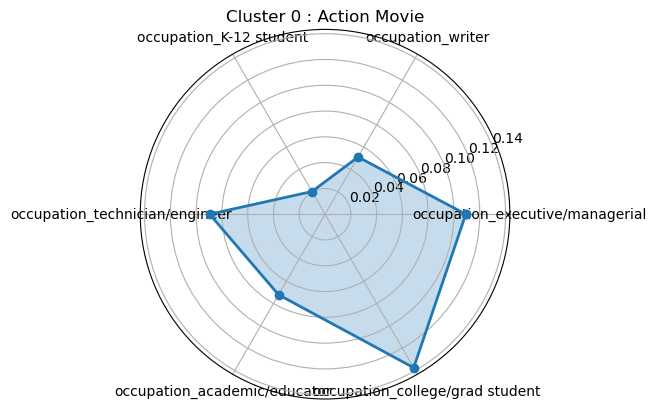

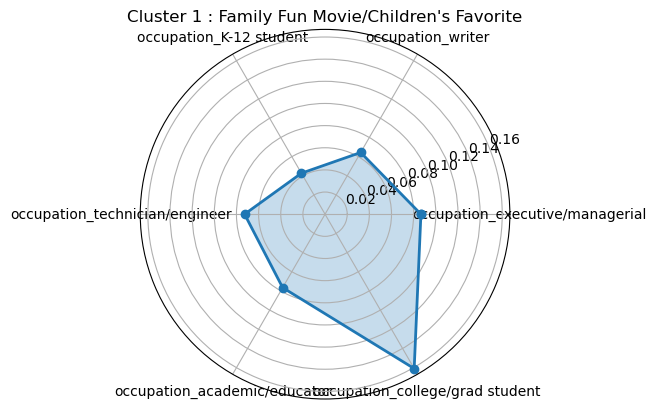

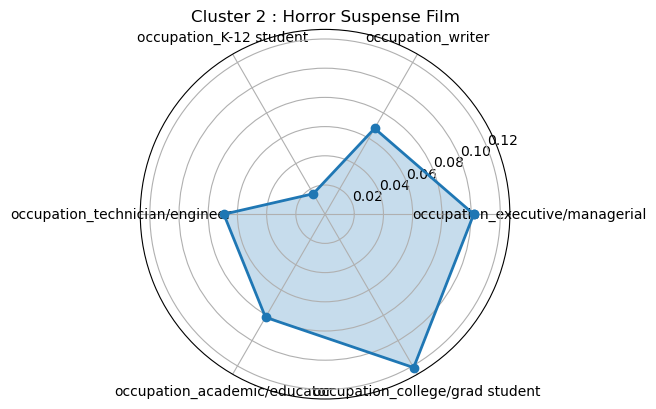

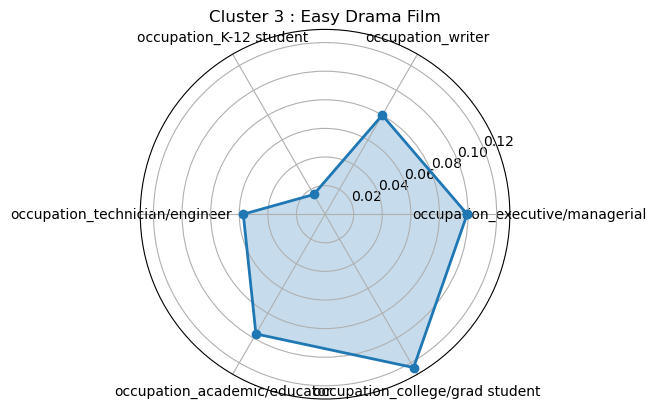

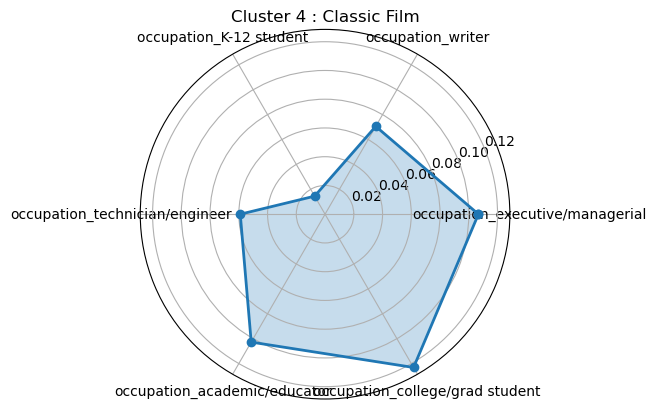

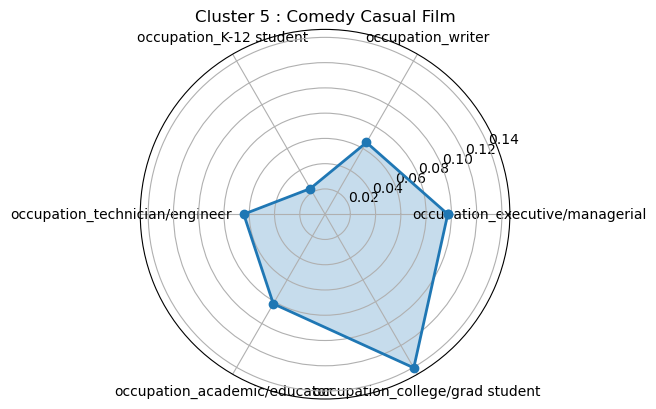

In [89]:
# 根据每个类的信息总结电影风格
cluster_style={0: "Action Movie", 1: "Family Fun Movie/Children's Favorite", 2: "Horror Suspense Film", 3: "Easy Drama Film", 4: "Classic Film", 5: "Comedy Casual Film"}

# 生成每个类的雷达图
def plot_rader_chart(labels,stats,name):
    labels=np.array(labels)
    stats=list(stats)
    angles=np.linspace(0,2*np.pi,len(labels),endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure()
    fig.tight_layout(pad=1.0)
    ax=fig.add_subplot(111,polar=True)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.plot(angles,stats,'o-',linewidth=2)
    ax.fill(angles,stats,alpha=0.25)
    ax.set_title(name)
    
for i,row in enumerate(cluster_user_features.iterrows()):
    plot_rader_chart(features,row[1][features],f"Cluster {i} : {cluster_style[i]}")
plt.show()
    

In [90]:
# 统计用户特征

## 获取每个用户观看过的电影的聚类标签
user_cluster_counts=data.groupby("user_id")["cluster"].value_counts(normalize=True)
user_cluster_counts=pd.DataFrame(user_cluster_counts)
user_cluster_counts=user_cluster_counts.rename({"cluster":"count"},axis=1)
display(user_cluster_counts)

## 找到每个用户最喜欢和最不喜欢的电影聚类
user_fav_cluster=user_cluster_counts.loc[user_cluster_counts.groupby("user_id")["count"].idxmax()].drop(columns=["count"]).droplevel("user_id")
user_least_fav_cluster=user_cluster_counts.loc[user_cluster_counts.groupby("user_id")["count"].idxmin()].drop(columns=["count"]).droplevel("user_id")
# display(user_fav_cluster)
# display(user_least_fav_cluster)

users_temp["fav_cluster"]=(user_fav_cluster.index)
users_temp["least_fav_cluster"]=(user_least_fav_cluster.index)
print(users_temp["fav_cluster"].value_counts())
print(users_temp["least_fav_cluster"].value_counts())
display(users_temp)

count
user_id cluster          
2       0        0.434109
        4        0.395349
        3        0.093023
        5        0.077519
5       4        0.393939
...                   ...
6040    5        0.205279
        2        0.164223
        0        0.123167
        3        0.093842
        1        0.014663

[17242 rows x 1 columns]

0    1078
4     914
5     749
2     134
1      34
Name: fav_cluster, dtype: int64
1    1552
3     985
2     229
4      90
0      30
5      23
Name: least_fav_cluster, dtype: int64


,user_id,gender,zipcode,age_desc,occupation_K-12 student,occupation_academic/educator,occupation_artist,occupation_clerical/admin,occupation_college/grad student,occupation_customer service,...,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer,movie_count,fav_cluster,least_fav_cluster
0,2,1,70072,56+,0,0,0,0,0,0,...,0,0,1,0,0,0,0,129,0,5
1,5,1,55455,25-34,0,0,0,0,0,0,...,0,0,0,0,0,0,1,198,4,1
2,8,1,11413,25-34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,139,4,2
3,9,1,61614,25-34,0,0,0,0,0,0,...,0,0,0,1,0,0,0,106,4,1
4,10,0,95370,35-44,0,1,0,0,0,0,...,0,0,0,0,0,0,0,401,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,6035,0,78734,25-34,0,1,0,0,0,0,...,0,0,0,0,0,0,0,280,5,1
2905,6036,0,32603,25-34,0,0,0,0,0,0,...,0,1,0,0,0,0,0,888,4,1
2906,6037,0,76006,45-49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,202,4,1
2907,6039,0,01060,45-49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,123,5,0


In [91]:

def create_words_cloud(text):
    stopwords=list(STOPWORDS)+["Luke","Darth","Vader","year","one","two","three","four","five","six","seven","six","eight","nine","ten"]
    words=text
    wc=WordCloud(background_color="white",
                 stopwords=stopwords)
    wc.generate(words)
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.imshow(wc)
    ax.axis("off")
    plt.show()


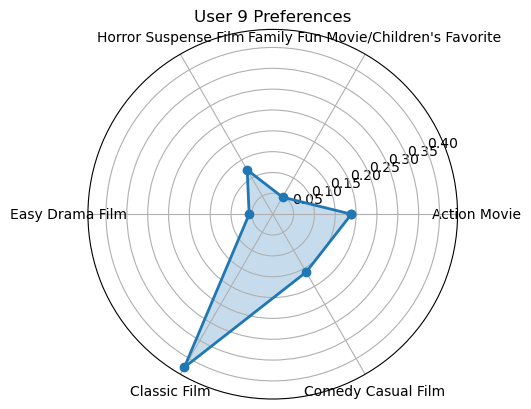

Favorite Movie Cluster: Classic Film
Least Favorite Movie Cluster: Family Fun Movie/Children's Favorite
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
284,296,Pulp Fiction (1994),Crime|Drama,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta|Uma Thurman|Samuel L. Jackson,1638,4
574,593,"Silence of the Lambs, The (1991)",Drama|Thriller,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,Jodie Foster|Anthony Hopkins|Lawrence A. Bonney,1799,4
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
1165,1270,Back to the Future (1985),Comedy|Sci-Fi,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox|Christopher Lloyd|Lea Thompson,1866,5


User 9 Preferences Word Cloud: 


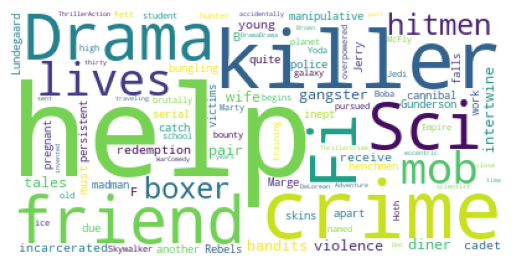

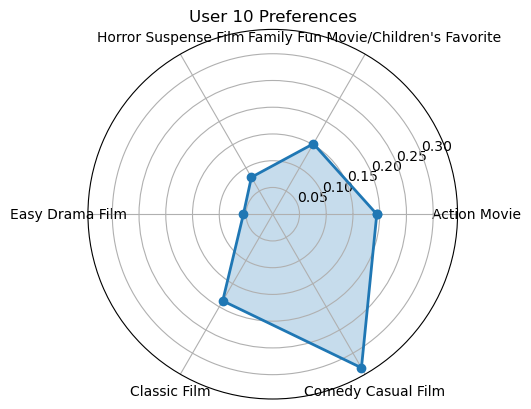

Favorite Movie Cluster: Comedy Casual Film
Least Favorite Movie Cluster: Easy Drama Film
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
2488,2716,Ghostbusters (1984),Comedy|Horror,Three former parapsychology professors set up ...,Ivan Reitman,Bill Murray|Dan Aykroyd|Sigourney Weaver,1633,5
1160,1265,Groundhog Day (1993),Comedy|Romance,A weatherman finds himself inexplicably living...,Harold Ramis,Bill Murray|Andie MacDowell|Chris Elliott,1720,5
1165,1270,Back to the Future (1985),Comedy|Sci-Fi,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox|Christopher Lloyd|Lea Thompson,1866,5
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4


User 10 Preferences Word Cloud: 


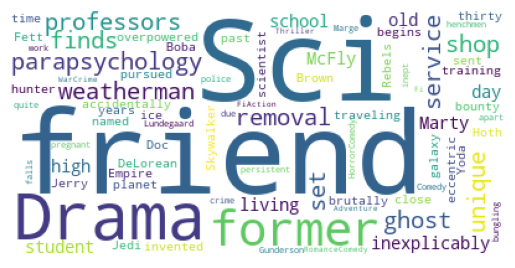

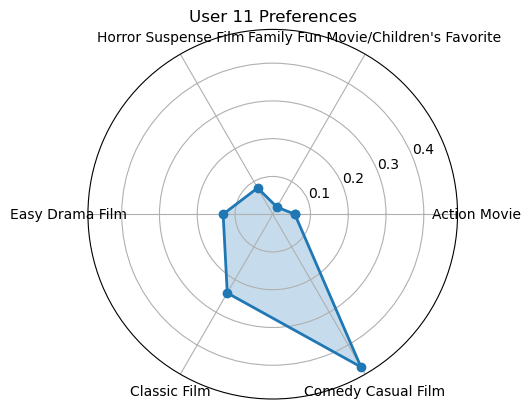

Favorite Movie Cluster: Comedy Casual Film
Least Favorite Movie Cluster: Family Fun Movie/Children's Favorite
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
2488,2716,Ghostbusters (1984),Comedy|Horror,Three former parapsychology professors set up ...,Ivan Reitman,Bill Murray|Dan Aykroyd|Sigourney Weaver,1633,5
1160,1265,Groundhog Day (1993),Comedy|Romance,A weatherman finds himself inexplicably living...,Harold Ramis,Bill Murray|Andie MacDowell|Chris Elliott,1720,5
1165,1270,Back to the Future (1985),Comedy|Sci-Fi,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox|Christopher Lloyd|Lea Thompson,1866,5
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4
2628,2858,American Beauty (1999),Comedy|Drama,A sexually frustrated suburban father has a mi...,Sam Mendes,Kevin Spacey|Annette Bening|Thora Birch,2037,3


User 11 Preferences Word Cloud: 


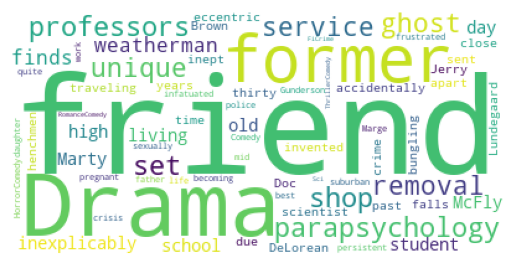

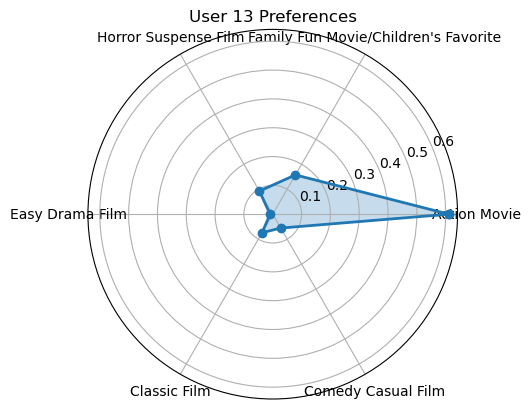

Favorite Movie Cluster: Action Movie
Least Favorite Movie Cluster: Easy Drama Film
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
1107,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,After a daring mission to rescue Han Solo from...,Richard Marquand,Mark Hamill|Harrison Ford|Carrie Fisher,1939,0
250,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,Luke Skywalker joins forces with a Jedi Knight...,George Lucas,Mark Hamill|Harrison Ford|Carrie Fisher,2028,0
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
1012,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,A troubled child summons the courage to help a...,Steven Spielberg,Henry Thomas|Drew Barrymore|Peter Coyote,1691,1
2534,2762,"Sixth Sense, The (1999)",Thriller,A boy who communicates with spirits seeks the ...,M. Night Shyamalan,Bruce Willis|Haley Joel Osment|Toni Collette,1665,2


User 13 Preferences Word Cloud: 


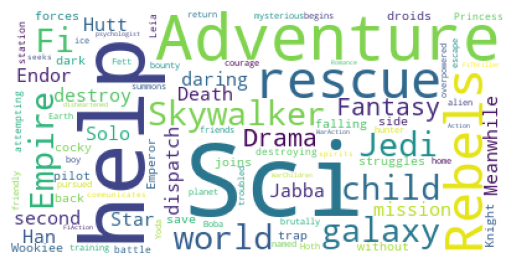

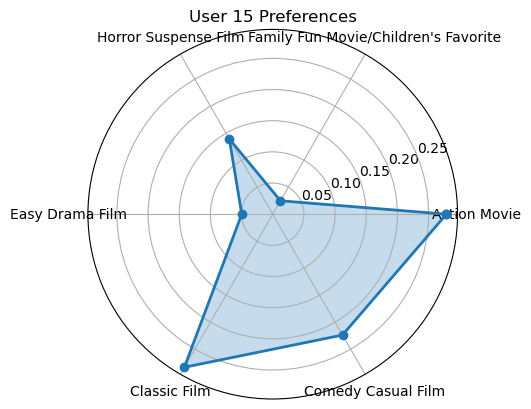

Favorite Movie Cluster: Classic Film
Least Favorite Movie Cluster: Family Fun Movie/Children's Favorite
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
284,296,Pulp Fiction (1994),Crime|Drama,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta|Uma Thurman|Samuel L. Jackson,1638,4
574,593,"Silence of the Lambs, The (1991)",Drama|Thriller,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,Jodie Foster|Anthony Hopkins|Lawrence A. Bonney,1799,4
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
1165,1270,Back to the Future (1985),Comedy|Sci-Fi,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox|Christopher Lloyd|Lea Thompson,1866,5


User 15 Preferences Word Cloud: 


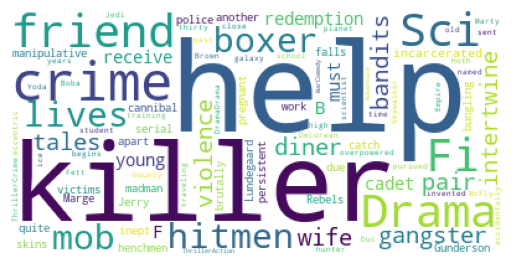

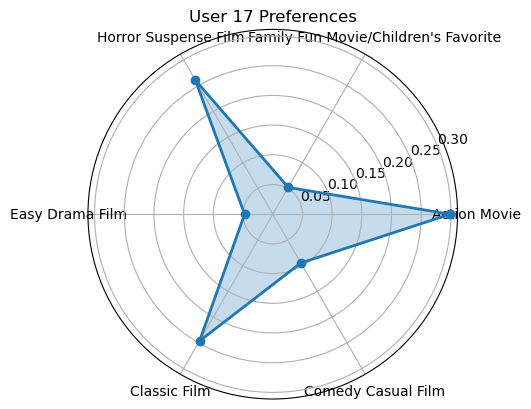

Favorite Movie Cluster: Action Movie
Least Favorite Movie Cluster: Easy Drama Film
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
1107,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,After a daring mission to rescue Han Solo from...,Richard Marquand,Mark Hamill|Harrison Ford|Carrie Fisher,1939,0
250,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,Luke Skywalker joins forces with a Jedi Knight...,George Lucas,Mark Hamill|Harrison Ford|Carrie Fisher,2028,0
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
2534,2762,"Sixth Sense, The (1999)",Thriller,A boy who communicates with spirits seeks the ...,M. Night Shyamalan,Bruce Willis|Haley Joel Osment|Toni Collette,1665,2
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4


User 17 Preferences Word Cloud: 


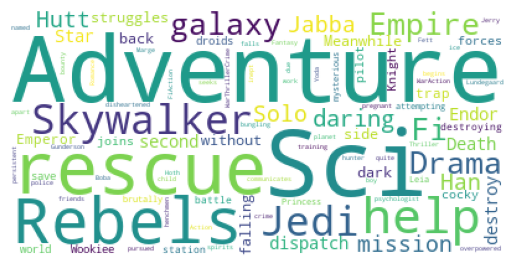

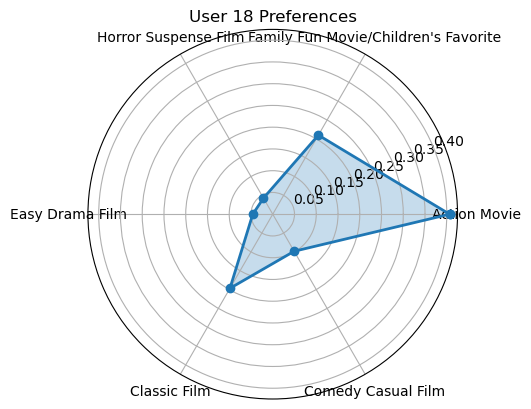

Favorite Movie Cluster: Action Movie
Least Favorite Movie Cluster: Horror Suspense Film
Representative Movies:


,movie_id,title,genres,intro,directors,stars,rating_count,cluster
1107,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,After a daring mission to rescue Han Solo from...,Richard Marquand,Mark Hamill|Harrison Ford|Carrie Fisher,1939,0
250,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,Luke Skywalker joins forces with a Jedi Knight...,George Lucas,Mark Hamill|Harrison Ford|Carrie Fisher,2028,0
1093,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,After the Rebels are brutally overpowered by t...,Irvin Kershner,Mark Hamill|Harrison Ford|Carrie Fisher,2132,0
1012,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,A troubled child summons the courage to help a...,Steven Spielberg,Henry Thomas|Drew Barrymore|Peter Coyote,1691,1
588,608,Fargo (1996),Crime|Drama|Thriller,Jerry Lundegaard's inept crime falls apart due...,Joel Coen|Ethan Coen,William H. Macy|Frances McDormand|Steve Buscemi,1815,4


User 18 Preferences Word Cloud: 


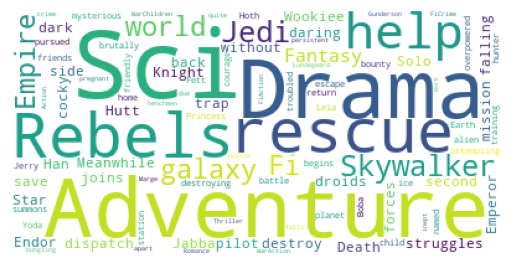

In [92]:
# 用户画像
## 生成用户观影偏好雷达图，并给出能表示用户观影偏好的 5 部代表性电影，根据这 5 部代表性电影，给出用户偏好词云
for i in range(3,10):
    id=users_temp.loc[i,'user_id']
    name=f"User {id} Preferences"
    labels=[cluster_style[i] for i in cluster_style]
    stats=(user_cluster_counts.loc[id])
    for j in range(len(labels)):
        if j not in stats.index:
            stats.loc[j]=0
    stats=stats.sort_index()
    plot_rader_chart(labels,stats.values,name)
    plt.show()

    ## 给出用户最喜欢的电影类型和最讨厌的电影类型
    fav_cluster=users_temp.loc[i,"fav_cluster"]
    least_fav_cluster=users_temp.loc[i,"least_fav_cluster"]
    print(f"Favorite Movie Cluster: {cluster_style[fav_cluster]}")
    print(f"Least Favorite Movie Cluster: {cluster_style[least_fav_cluster]}")

    print("Representative Movies:")
    ## 选出代表性的三类电影，
    represent_clusters=list((stats.sort_values(by="count").index)[-3:])
    ## 选出这两类电影中观看人次最多的 5 部电影
    represent_movies=pd.concat([cluster_popular_movies[represent_clusters[2]][-3:],cluster_popular_movies[represent_clusters[1]][-1:],cluster_popular_movies[represent_clusters[0]][-1:]],axis=0)
    display(represent_movies)

    ## 生成用户偏好词云
    print(f"User {id} Preferences Word Cloud: ")
    text_features=represent_movies["intro"].sum()+represent_movies["genres"].sum()
    create_words_cloud(text_features)
    
    